## huang-yuting-homework4

In [340]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ipywidgets

In [341]:
ufo = pd.read_csv('https://github.com/UIUC-iSchool-DataViz/is445_spring2022/raw/master/week05/data/ufo-scrubbed-geocoded-time-standardized-00.csv',
                 names = ["date", "city", "state", "country", "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                 parse_dates = ["date", "report_date"])

In [342]:
ufo.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [343]:
ufo = ufo.fillna({'country':'unknown',
                  'state':'unknown', 
                  'shape':'unknown'})

In [344]:
ufo

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [345]:
nsamples = 1000
downSampleMask = np.random.choice(range(len(ufo)-1), nsamples, replace = False)

In [346]:
downSampleMask

array([59308, 53305, 48323, 58585,  4509, 78653, 75262, 35392,  3354,
       47028, 46610, 64760, 57280, 37745, 79106, 71884, 60638, 60386,
       30153, 59261, 23754,  6993, 10167, 51052, 47573, 61915, 36032,
       29677, 54135, 67041, 29362, 68373, 44614, 45819, 35719, 19053,
       74398, 54588, 44806, 67266,  8358, 19384, 74236, 34723, 35695,
       68460, 57799, 33525, 11730, 21384, 70856, 67357, 20591, 62888,
       59623, 55052, 15825, 25203, 46695,  4971,  7401, 63214, 63895,
       35260, 33776, 75730, 18640, 15564, 12852,  4490, 54561, 65998,
       33515, 80203, 59624, 40683, 76099, 64005, 43037, 47199, 51276,
       37794, 67719, 76464, 53085, 72720, 56896, 34788, 13145, 35639,
       38345, 37136, 66755,  2090, 55417, 55617, 49730, 40134, 46867,
        2803,  9026, 18786, 23391, 50492, 64589, 55156, 34551, 27006,
       66526, 72595, 58614, 32883, 49695, 59130,  2211, 43447, 40916,
       36712, 22955,   843, 31172, 26836, 57133, 21079, 36877, 58502,
       77518, 73188,

In [347]:
ufoDS = ufo.loc[downSampleMask]

In [348]:
ufoDS #using this dataset for plotting

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
59308,2011-07-23 19:20:00,houston,tx,us,fireball,1200.0,20 minutes,Orange Orb/Ball near Downtown Houston.,2012-08-19,29.763056,-95.363056
53305,2000-06-03 23:30:00,new york city (brooklyn),ny,us,chevron,3600.0,1 hour,Satellites searching area before and after 2...,2000-07-11,40.714167,-74.006389
48323,2011-06-13 02:00:00,bay city,mi,us,unknown,3000.0,30-50 minutes,Very bright white light low over Saginaw Bay&#...,2011-06-20,43.594444,-83.888889
58585,2006-07-21 01:20:00,vancouver,wa,us,disk,3600.0,nearly an hour,Saucer like object with clear red &amp; blue l...,2006-10-30,45.638889,-122.660278
4509,2006-10-25 18:00:00,tokyo (japan),unknown,unknown,light,120.0,2 mins,Noticed strange cloud moving across Tokyo Sky ...,2007-02-01,35.689488,139.691706
...,...,...,...,...,...,...,...,...,...,...,...
38650,2004-04-23 19:30:00,coram,ny,us,triangle,120.0,2min,While driving on a neighborhood road on the wa...,2004-05-04,40.868611,-73.001944
71735,2012-08-05 22:28:00,ashby,mn,us,light,300.0,5 minutes,A star like object moves across the sky at sup...,2012-08-19,46.093056,-95.817222
56351,2010-07-14 13:00:00,englewood,co,us,oval,540.0,9 min,I think about this almost every day and how lu...,2012-07-04,39.647778,-104.987222
47707,1998-06-01 18:00:00,denmark,sc,us,triangle,300.0,5 min.,Triangle shape object&#44 black with light wit...,2006-02-14,33.322500,-81.142500


## 1. Allows the user to change the x and y fields on a scatter plot from the UFO dataset.  Here the "fields" are the names of the columns in the dataset.  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column in for each of x and y.  Note: you don't have to support both axis having a categorical variable (unless you really want to!).

In [349]:
def ufo_xy(x, y, take_log = True):
    if take_log:
        log = np.log10(ufoDS['duration_seconds'])
    else:
        log = ufoDS['duration_seconds']
    plt.scatter(ufoDS[x], ufoDS[y], c = log ,cmap='rainbow')
    plt.show()


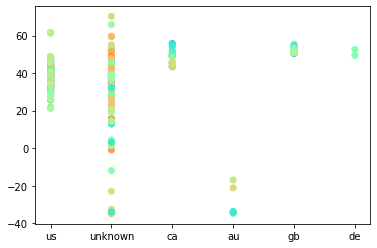

In [350]:
ufo_xy('country', 'latitude')

In [351]:
ufoDS.columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [352]:
ufoDS.dtypes

date                datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
duration_seconds           float64
duration                    object
comment                     object
report_date         datetime64[ns]
latitude                   float64
longitude                  float64
dtype: object

In [353]:
ufoDS.select_dtypes?

In [354]:
# Reference: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
# select_dtyles function
# Reference: https://vimsky.com/examples/usage/python-pandas-dataframe-select_dtypes.html
# include, exclude functions
# x-widgets is designed for choosing categorical variables by using select_dtypes
x = ipywidgets.Dropdown(options = list(ufoDS.select_dtypes(exclude='number').columns), description = 'Select a categorical column:')
x

Dropdown(description='Select a categorical column:', options=('date', 'city', 'state', 'country', 'shape', 'du…

In [355]:
x.style.description_width = 'initial'
x

Dropdown(description='Select a categorical column:', options=('date', 'city', 'state', 'country', 'shape', 'du…

In [356]:
# y-widgets is designed for choosing numerical variables by using select_dtypes
y = ipywidgets.Dropdown(options = list(ufoDS.select_dtypes(include='number').columns), description = 'Select a numerical column:')
y

Dropdown(description='Select a numerical column:', options=('duration_seconds', 'latitude', 'longitude'), valu…

In [357]:
y.style.description_width = 'initial'
y

Dropdown(description='Select a numerical column:', options=('duration_seconds', 'latitude', 'longitude'), styl…

In [358]:
ipywidgets.VBox([x, y])

In [359]:
def ufo_xy(x, y):
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(8, 4))
    #if take_log:
        #log = np.log10(ufoDS['duration_seconds'])
    #else:
        #log = ufo['duration_seconds']
        #plt.scatter(x = ufoDS[x], y = ufoDS[y], c = log ,s = 20,cmap = 'rainbow')
        plt.scatter(x = ufoDS[x], y = ufoDS[y],c =np.log10(ufoDS['duration_seconds'])  ,s = 20,cmap = 'rainbow')
        plt.xlabel(x.capitalize())
        plt.ylabel(y.capitalize())
        plt.title("%s vs %s"%(x.capitalize(), y.capitalize()))
        plt.show()

In [360]:
#References: https://coderzcolumn.com/tutorials/data-science/interactive-charts-using-matplotlib-and-ipywidgets
# the interactive_output function helps to combine the ufo_xy, x, and y ipywidgets.
out = ipywidgets.interactive_output(ufo_xy, {'x': x, 'y':y})

In [361]:
ipywidgets.HBox([ipywidgets.VBox([x, y]), out])

In [362]:
#I use HBox first, then use VBox. Becuase the ipywidgets are blocked by the graph
ipywidgets.VBox([ipywidgets.HBox([x, y]), out])

### 1. writeup
I want the user would be able to choose any two columns. One is a categorical column and another one is a numerical column. First, I use the select_dytpes function to check if there is a numerical data type and then separate all columns into two groups. Next, I define the ufo_xy function to plot the scatter with the interactive_output function. The interactive_output function helps to connect the ufo_xy function, x, and y ipywidgets. Then, I use VBox and HBox to change the display.

## 2. Allows the user to pick their colormap.  In class we used the log of the duration in seconds as our color scaling, you can use this or something else (or if you *really* want to get fancy you can let the user decide by using a widget!). Hint: for some ideas about how to add in a colormap widget, check out the extra notes on the Michigan depth map from this week and last week.

In [363]:
#def ufo_xy(x, y, take_log = True):
def ufo_plot(x, y, style, color_map):
    with plt.style.context(style):
        fig = plt.figure(figsize=(10, 10))
    #if take_log:
        #log = np.log10(ufoDS['duration_seconds'])
    #else:
        #log = ufo['duration_seconds']
        #plt.scatter(x = ufoDS[x], y = ufoDS[y], c = log ,s = 20,cmap = 'rainbow')
        plt.scatter(x = ufoDS[x], y = ufoDS[y] ,c = np.log(ufoDS['duration_seconds']),s = 200,cmap = color_map)
        plt.xlabel(x.capitalize())
        plt.ylabel(y.capitalize())
        #plt.imshow(X = ufoDS, cmap= colormap_name)
        plt.title("%s vs %s"%(x.capitalize(), y.capitalize()))
        plt.show()

In [364]:
style_widgets = ipywidgets.Dropdown(options = plt.style.available, description = 'Select a style:')
style_widgets

Dropdown(description='Select a style:', options=('Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', '…

In [365]:
style_widgets.style.description_width = 'initial'
style_widgets

Dropdown(description='Select a style:', options=('Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', '…

In [366]:
color_map = ipywidgets.Dropdown(options = plt.colormaps(), description = 'Select a color map')
color_map

Dropdown(description='Select a color map', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r'…

In [367]:
color_map.style.description_width = 'initial'
color_map

Dropdown(description='Select a color map', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r'…

In [368]:
out2 = ipywidgets.interactive_output(ufo_plot, {'x': x, 'y':y, 'style':style_widgets, 'color_map':color_map})

In [369]:
#ipywidgets.HBox([ipywidgets.VBox([x, y, color_widgets]), out2])
ipywidgets.VBox([x, y, style_widgets,color_map, out2])


### 2. writeup
For question 2, I define the ufo_plot function first. I was trying to incorporate the condition clause of the log, but it did not work. Therefore, I took off the log condition and put the log in the plt.scatter function. I design four variables into the ufo_plot function. X is used for the categorical column, y is used for the numerical column, style is used for choosing plot style and color_map is used for picking colormap. I put the style variable into function because I was confused about the differences in style and colormap. This would help me remember what is style and colormap. Next, I use VBox to display the sequences of ipywidgets and the scatter plot.

## 3. 
1. The field to "bin".  (Do you want the user to be able to pick any 2 columns?  Or only certain columns?  Why or why not?). You must support the selection of at least 1 categorical column and at least 1 numerical column.
2. For numerical variables: The number of bins.

In [370]:
# design xy for picking the first column
xy = ipywidgets.Dropdown(options = list(ufoDS.columns))
xy

Dropdown(options=('date', 'city', 'state', 'country', 'shape', 'duration_seconds', 'duration', 'comment', 'rep…

In [371]:
# design xy2 for picking the second column at the same time
xy2 = ipywidgets.Dropdown(options = list(ufoDS.columns))
xy2

Dropdown(options=('date', 'city', 'state', 'country', 'shape', 'duration_seconds', 'duration', 'comment', 'rep…

In [372]:
# change the bin numbers
bin_number = ipywidgets.IntSlider(min = 1, max = 50, step = 1)

In [373]:
bin_number

IntSlider(value=1, max=50, min=1)

In [374]:
# make a numerical variable list 
num_list = list(ufoDS.select_dtypes(include=['float64']).columns)
num_list

['duration_seconds', 'latitude', 'longitude']

In [375]:
# make a categorical variable list
cate_list = list(ufoDS.select_dtypes(exclude=['float64']).columns)
cate_list

['date',
 'city',
 'state',
 'country',
 'shape',
 'duration',
 'comment',
 'report_date']

In [376]:
def ufo_binplot(xy, bin_number):
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,10))
    if xy in num_list:
        ufoDS.hist(column=xy, ax=ax, bins = bin_number)
    else:
        plt.bar(xy, height = 4, data = ufoDS, color = 'blue', log = True)
    plt.show()

In [377]:
out3 = ipywidgets.interactive_output(ufo_binplot, {'xy':xy, 'bin_number':bin_number})

In [379]:
ipywidgets.VBox([xy,bin_number, out3])

In [380]:
# for the reference
# this function is built for only numerical column and test the bin_number ipywidget works
def ufo_binplot1(y, bin_number):
    plt.clf()
    fig, ax = plt.subplots(figsize=(10,10))
    ufoDS.hist(column=y, ax=ax, bins = bin_number)
    plt.show()

In [381]:
out4 = ipywidgets.interactive_output(ufo_binplot1, {'y':y, 'bin_number':bin_number})

In [383]:
ipywidgets.VBox([y,bin_number, out4])

### 3. writeup
I design the ufo_binplot function for the user to pick any column, but it only allows pick one in one time. Because I did not find the method to pick two columns at the same time.

xy ipywidget. -> user can pick any column
xy2 ipywidget. -> user can pick any column
bin_number ipywidget. -> user can choose the number of bins
num_list. -> list of numerical columns
cate_list. -> list of categorical columns

I designed the xy and xy2 ipywidgets for picking two columns and used belowed codes:

If xy in num_list:
	ufoDS.hist(column=xy, ax=ax, bins = bin_number)
    if xy2 in cate_list: 
		plt.bar(xy2, height = 4, data = ufoDS, color = 'blue', log = True)
elif xy in cate_list:
	plt.bar(xy, height = 4, data = ufoDS, color = 'blue', log = True)
	if xy2 in num_list:
 		ufoDS.hist(column=xy2, ax=ax, bins = bin_number)

The above code did not work, so I only design a function for picking any one column.
Also, when I run the ipywidgets.VBox function several times, it would have blank plots. I use the ufo_binplot1 function for reference. This function is built for the numerical column.

